Filename: sw00871316000brt1s.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  RATE          1 BinTableHDU   1008   3689R x 2C   [1D, 1J]   
None
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                    8 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H TELESCOP= 'SWIFT   '           / Telescope (mission) name                       INSTRUME= 'BAT     '           / Instrument name                                OBS_ID  = '00871316000'        / Observation ID                                 TARG_ID =               871316 / Target ID                     

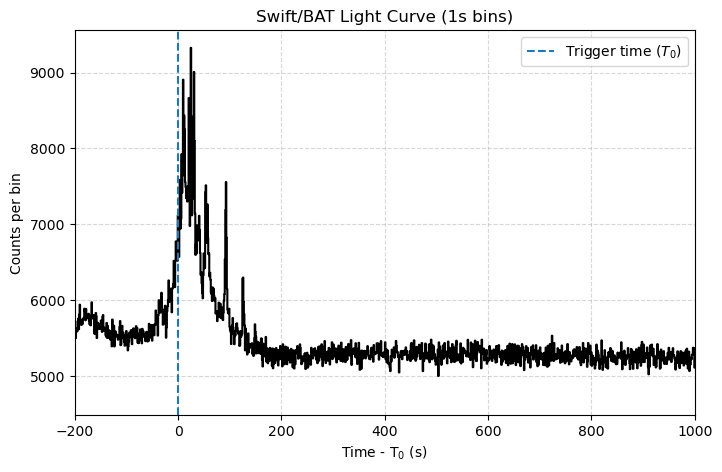

In [291]:
from astropy.io import fits
import matplotlib.pyplot as plt

# read data
hdul = fits.open('sw00871316000brt1s.lc')
print(hdul.info())  # 看看每个HDU的内容结构
print(hdul[0].header)  # 查看主头信息
data = hdul[1].data
print(data.columns)
time = data['TIME']
counts = data['COUNTS']
header = hdul[0].header
T0 = header['TRIGTIME']  # BAT触发时间
hdul.close()

print(T0)
plt.figure(figsize=(8,5))
plt.plot(time - T0, counts, drawstyle='steps-mid', color='black')

plt.xlabel(r'Time - $\rm T_{0}$ (s)')
plt.ylabel('Counts per bin')
plt.title('Swift/BAT Light Curve (1s bins)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-200, 1000)
plt.axvline(T0 - T0,0,1, label = r'Trigger time ($T_0$)', linestyle = '--')
plt.legend()
plt.show()

Filename: sw00871316000bev1s.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  RATE          1 BinTableHDU    308   1202R x 5C   [D, 4D, 4D, J, D]   
  2  EBOUNDS       1 BinTableHDU    290   4R x 3C   [I, E, E]   
  3  STDGTI        1 BinTableHDU    141   1R x 2C   [D, D]   


None
ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = '4D'; unit = 'count/s'
    name = 'ERROR'; format = '4D'; unit = 'count/s'
    name = 'TOTCOUNTS'; format = 'J'; unit = 'count'
    name = 'FRACEXP'; format = 'D'
)


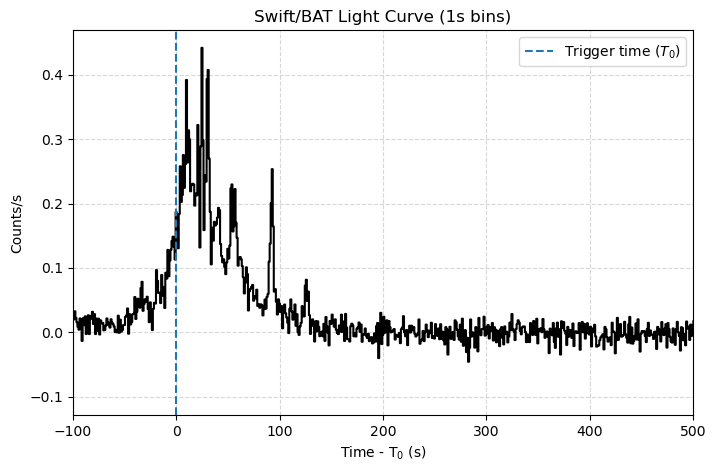

In [292]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# read data
hdul = fits.open('sw00871316000bev1s.lc')
print(hdul.info())  # 看看每个HDU的内容结构
#print(hdul[0].header)  # 查看主头信息
data = hdul[1].data
print(data.columns)
time = data['TIME']
counts = np.sum(data['RATE'], axis=1)
header = hdul[0].header
T0 = header['TRIGTIME'] 
hdul.close()

plt.figure(figsize=(8,5))
plt.plot(time-T0, counts, drawstyle='steps-mid', color='black')

plt.xlabel(r'Time - $\rm T_{0}$ (s)')
plt.ylabel('Counts/s')
plt.title('Swift/BAT Light Curve (1s bins)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-100, 500)
#plt.axvline(563532233.216,0,1)
plt.axvline(T0 - T0,0,1, label = r'Trigger time ($T_0$)', linestyle = '--')
plt.legend()
plt.show()

Filename: sw00871316000bevsl.pha
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  SPECTRUM      1 BinTableHDU    338   80R x 4C   [I, D, D, D]   
  2  EBOUNDS       1 BinTableHDU    290   80R x 3C   [I, E, E]   
  3  STDGTI        1 BinTableHDU    138   1R x 2C   [D, D]   


ColDefs(
    name = 'CHANNEL'; format = 'I'
    name = 'RATE'; format = 'D'; unit = 'count/s'
    name = 'STAT_ERR'; format = 'D'; unit = 'count/s'
    name = 'SYS_ERR'; format = 'D'
)
ColDefs(
    name = 'CHANNEL'; format = 'I'
    name = 'E_MIN'; format = 'E'; unit = 'keV'
    name = 'E_MAX'; format = 'E'; unit = 'keV'
)


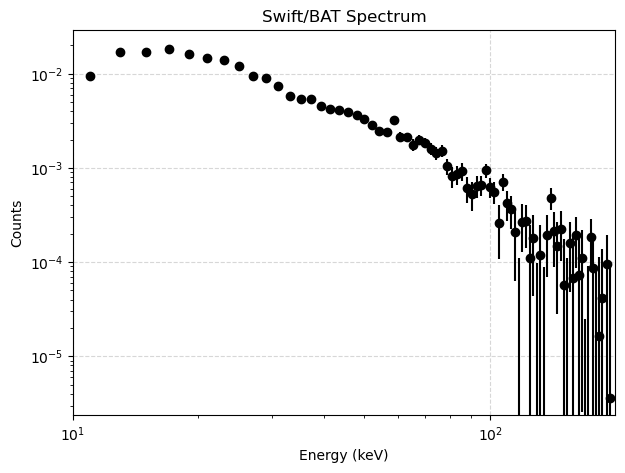

In [293]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# 打开文件
hdul = fits.open('sw00871316000bevsl.pha')

# 查看 HDU 信息
hdul.info()
#print(hdul[1].header)  # SPECTRUM 的头信息
print(hdul[1].columns)
print(hdul[2  ].columns)  

# 读取光谱数据
spec_data = hdul[1].data
#channel = spec_data['CHANNEL']       # 通道号
counts = spec_data['RATE']         
stat_err = spec_data['STAT_ERR']     
sys_err = spec_data['SYS_ERR']      

# 读取能量通道信息
ebounds = hdul[2].data
energy_low = ebounds['E_MIN']
energy_high = ebounds['E_MAX']
energy_center = (energy_low + energy_high)/2

plt.figure(figsize=(7,5))
plt.errorbar(energy_center, counts, yerr=stat_err, fmt='o', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Swift/BAT Spectrum')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(1e1, 10**2.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

hdul.close()


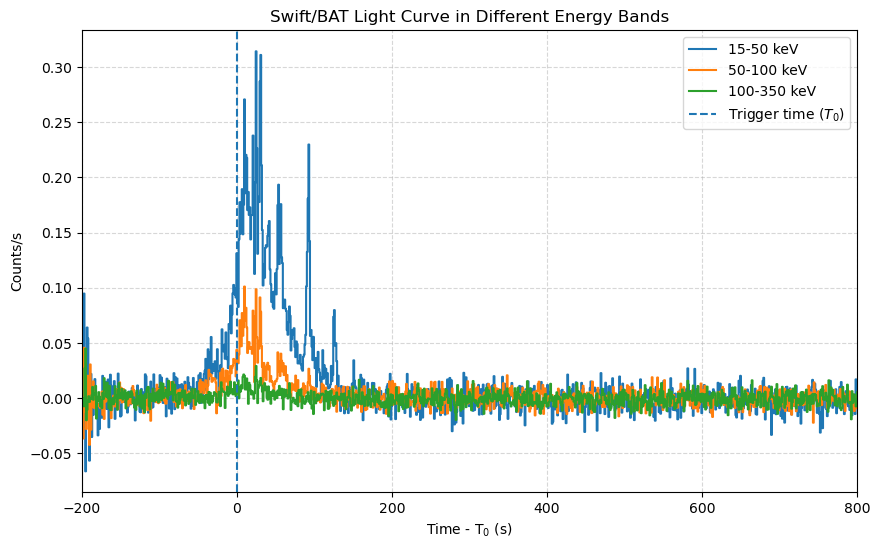

In [294]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

hdul = fits.open('sw00871316000bev1s.lc')
data = hdul[1].data
time = data['TIME']      
rate = data['RATE']     
header = hdul[0].header
T0 = header['TRIGTIME'] 

ebounds = hdul[2].data
channel_low = ebounds['E_MIN']
channel_high = ebounds['E_MAX']

low_idx = np.where(channel_high <= 50)[0]        
mid_idx = np.where((channel_low >= 50) & (channel_high <= 100))[0]  
high_idx = np.where(channel_low >= 100)[0]     

def combine_counts(rate, indices):
    if len(indices) == 0:
        return np.zeros(rate.shape[0])
    return np.sum(rate[:, indices], axis=1)

low_counts = combine_counts(rate, low_idx)
mid_counts = combine_counts(rate, mid_idx)
high_counts = combine_counts(rate, high_idx)


plt.figure(figsize=(10,6))
plt.plot(time - T0, low_counts, drawstyle='steps-mid', label='15-50 keV')
plt.plot(time - T0, mid_counts, drawstyle='steps-mid', label='50-100 keV')
plt.plot(time - T0, high_counts, drawstyle='steps-mid', label='100-350 keV')
plt.xlabel(r'Time - $\rm T_{0}$ (s)')
plt.ylabel('Counts/s')
plt.title('Swift/BAT Light Curve in Different Energy Bands')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-200, 800)
plt.axvline(T0 - T0,0,1, label = r'Trigger time ($T_0$)', linestyle = '--')
plt.legend()
plt.show()

hdul.close()



[6.77929851e-05 1.35585970e-04 2.03378955e-04 ... 9.99254506e-01
 9.99368200e-01 1.00000000e+00]
-42.47168855672463
99.47383202147392
T90 = 141.95 s


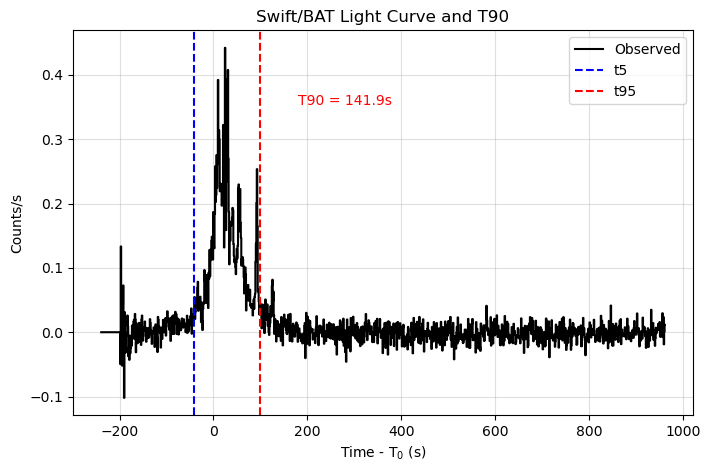

In [295]:
# Calculate T90
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdul = fits.open('sw00871316000bev1s.lc')
data = hdul[1].data
time = data['TIME']
counts = np.sum(data['RATE'], axis=1)
header = hdul[0].header
T0 = header['TRIGTIME']
hdul.close()

# background signal
T_min = T0 - 100
T_max = T0 + 200
pre_bg = (time <= T_min) 
post_bg = (time >= T_max)
bg_mask = pre_bg | post_bg
bg_rate = np.mean(counts[bg_mask])

# remove background and negative net values
net_counts = counts - bg_rate
#net_counts[net_counts < 0] = 0


cum_counts = np.cumsum(net_counts)
cum_counts = cum_counts / cum_counts[-1] # normalization
print(cum_counts)

t5 = np.interp(0.05, cum_counts, time - T0)
t95 = np.interp(0.95, cum_counts, time - T0)
T90 = t95 - t5
print(t5)
print(t95)

print(f"T90 = {T90:.2f} s")

plt.figure(figsize=(8,5))
plt.plot(time - T0, counts, drawstyle='steps-mid', color='black', label='Observed')
#plt.plot(time - T0, net_counts, color='gray', lw=1, label='Background-subtracted')
plt.axvline(t5, color='blue', ls='--', label='t5')
plt.axvline(t95, color='red', ls='--', label='t95')
plt.text(t95 + 80, max(counts)*0.8, f"T90 = {T90:.1f}s", color='red')
plt.xlabel(r'Time - $\rm T_{0}$ (s)')
plt.ylabel('Counts/s')
plt.title('Swift/BAT Light Curve and T90')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


Variance ratios R($\Delta t$) = [0.17820819 0.16968047 0.32060089 0.61040465 1.19018218 2.29152877
 4.03043707 6.57079609]
Estimated Minimum Variability Timescale (MVT) ≈ 8.00 s


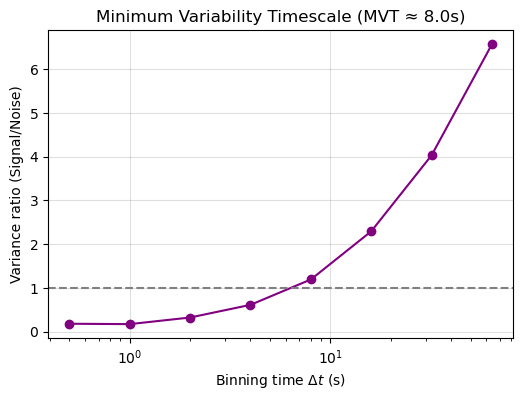

In [296]:
# Calculate MVT (rebin)
def rebin(time, counts, dt):
    t_start = time[0]
    t_end = time[-1]
    nbins = int((t_end - t_start) // dt)
    edges = np.linspace(t_start, t_start + nbins*dt, nbins+1)
    counts_rebinned, _ = np.histogram(time, bins=edges, weights=counts)
    t_mid = 0.5 * (edges[:-1] + edges[1:])
    return t_mid, counts_rebinned

# relative time array
t_rel = time - T0

# choose bin widths to test (秒)
bin_list = np.array([0.5, 1, 2, 4, 8, 16, 32, 64])

var_ratio = []

for dt in bin_list:
    t_bin, c_bin = rebin(t_rel, net_counts, dt)
    mean_rate = np.mean(c_bin)
    var_signal = np.var(c_bin) # var for signal 
    var_noise = mean_rate # var for poisson noise (= mean)
    ratio = var_signal / var_noise if var_noise > 0 else np.nan
    var_ratio.append(ratio)

var_ratio = np.array(var_ratio)

idx = np.where(var_ratio > 1)[0]
if len(idx) > 0:
    MVT = bin_list[idx[0]]
else:
    MVT = bin_list[np.nanargmax(var_ratio)]

print(r"Variance ratios R($\Delta t$) =", var_ratio)
print(f"Estimated Minimum Variability Timescale (MVT) ≈ {MVT:.2f} s")

plt.figure(figsize=(6,4))
plt.plot(bin_list, var_ratio, 'o-', color='purple')
plt.axhline(1, color='gray', ls='--')
plt.xlabel(r'Binning time $\Delta t$ (s)')
plt.ylabel('Variance ratio (Signal/Noise)')
plt.title(f'Minimum Variability Timescale (MVT ≈ {MVT:.1f}s)')
plt.xscale('log')
plt.grid(True, alpha=0.4)
plt.show()


1201.0


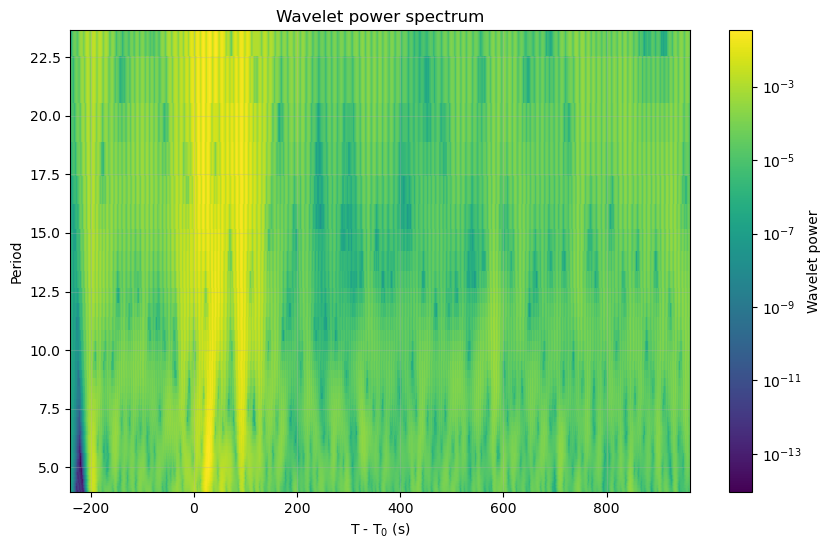

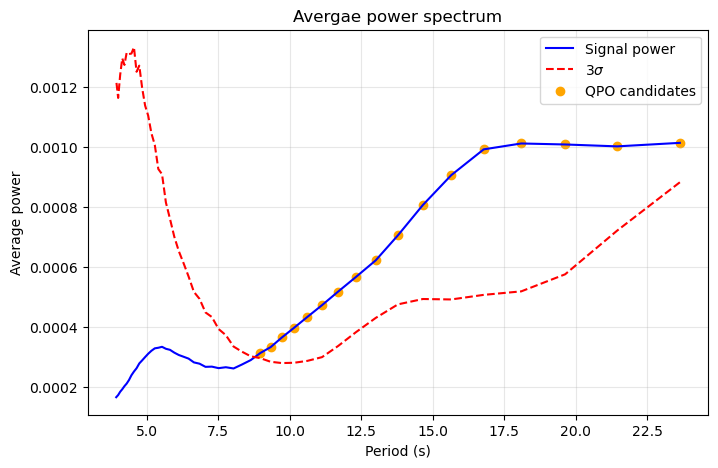

QPO Periods:[23.64 21.45 19.63 18.1  16.78 15.65 14.66 13.79 13.01 12.32 11.7  11.13
 10.62 10.16  9.73  9.34  8.97] s
MVT: 8.97 s


In [297]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pywt
from scipy.signal import detrend
import matplotlib.colors as colors
from scipy.ndimage import gaussian_filter1d

hdul = fits.open('sw00871316000bev1s.lc')
data = hdul[1].data
time = data['TIME']
counts = np.sum(data['RATE'], axis=1)
header = hdul[0].header
T0 = header['TRIGTIME']
hdul.close()

T_min = T0 - 100
T_max = T0 + 200
pre_bg = (time <= T_min)
post_bg = (time >= T_max)
bg_mask = pre_bg | post_bg
bg_rate = np.mean(counts[bg_mask])

net_counts = counts - bg_rate
net_counts[net_counts < 0] = 0


t_rel = time - T0
dt = np.mean(np.diff(time))

net_counts_detrend = net_counts

T_total = t_rel[-1] - t_rel[0]
print(T_total)
f_min = 100 / T_total
f_max = 0.5 / dt  # determined by Nyquist law
n_freqs = 50
freqs = np.linspace(f_min, f_max, n_freqs)

f0 = 10
scales = (f0 + np.sqrt(2 + f0**2)) / (4 * np.pi * freqs)

coeffs, freqs_cwt = pywt.cwt(net_counts_detrend, scales, 'morl', sampling_period=dt)
power = np.abs(coeffs)** 2
power = gaussian_filter1d(power, sigma=1, axis=1)

bg_counts = net_counts[bg_mask]
bg_detrend = bg_counts
bg_coeffs, _ = pywt.cwt(bg_detrend, scales, 'morl', sampling_period=dt)
bg_power = np.mean(np.abs(bg_coeffs)**2, axis=1)
mean_power = np.mean(power, axis=1)
signal_power = np.maximum(mean_power - bg_power, 0)

bg_std = np.std(np.abs(bg_coeffs)** 2, axis=1)
threshold = bg_power + 3 * bg_std
qpo_mask = signal_power > threshold
qpo_freqs = freqs_cwt[qpo_mask]
qpo_periods = 1 / qpo_freqs

if len(qpo_periods) > 0:
    min_variability = np.min(qpo_periods)
else:
    min_variability = 2 * dt

plt.figure(figsize=(10, 6))
periods = 1 / freqs_cwt
plt.pcolormesh(t_rel, periods, power, norm=colors.LogNorm(), cmap='viridis')
plt.colorbar(label='Wavelet power')
#plt.yscale('log')
plt.ylim(min(periods), max(periods))
plt.xlabel(r'T - $\rm T_{0}$ (s)')
plt.ylabel('Period')
plt.title('Wavelet power spectrum')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(1/freqs_cwt, signal_power, color='blue', label='Signal power')
plt.plot(1/freqs_cwt, threshold, color='red', ls='--', label=r'3$\sigma$')
if len(qpo_periods) > 0:
    plt.scatter(qpo_periods, signal_power[qpo_mask], color='orange', label='QPO candidates')
#plt.xscale('log')
plt.xlabel('Period (s)')
plt.ylabel('Average power')
plt.title('Avergae power spectrum')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"QPO Periods:{qpo_periods.round(2)} s" if len(qpo_periods) > 0 else "No QPO detected")
print(f"MVT: {min_variability:.2f} s")